# Homework 02
Austin Derrow-Pinion

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
%matplotlib inline

In [5]:
df = pd.read_csv('./Data/Boston_home_prices.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
print(df.shape)
df.dtypes

(506, 14)


crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [8]:
features = df.values[:,:13].astype(np.float64)
medv = df.medv.values.astype(np.float64)

features_s = scale(features)
medv_s = scale(medv)

print(features_s.shape)
print(medv_s.shape)

(506, 13)
(506,)


In [9]:
# Tensorflow

# y = wx + b
x = tf.constant(features_s, dtype='float32', shape=[506, 13])
y = tf.constant(medv_s, dtype='float32', shape=[506, 1])

w = tf.Variable(tf.truncated_normal([13, 1], stddev=1))
b = tf.Variable(0.0)

# error loss function
MSE = tf.reduce_mean(tf.square(tf.matmul(x, w) + b - y))

# define optimizer
STEPSIZE = 0.1
optimizer = tf.train.GradientDescentOptimizer(STEPSIZE).minimize(MSE)

# prediction with current weights
y_pred = tf.matmul(x, w) + b

# init all variables
init = tf.initialize_all_variables()

In [10]:
sess = tf.Session()
sess.run(init)

In [11]:
MAXSTEPS = 1000
for step in range(MAXSTEPS + 1):
    (_, mse, w0, b0) = sess.run([optimizer, MSE, w, b])
    if (step % 100) == 0:
        print('step = %-5d MSE = %-10f' % (step, mse))
print('done!')

step = 0     MSE = 8.622920  
step = 100   MSE = 0.273169  
step = 200   MSE = 0.260383  
step = 300   MSE = 0.259437  
step = 400   MSE = 0.259363  
step = 500   MSE = 0.259358  
step = 600   MSE = 0.259357  
step = 700   MSE = 0.259357  
step = 800   MSE = 0.259357  
step = 900   MSE = 0.259357  
step = 1000  MSE = 0.259357  
done!


In [14]:
# make predictions
pred_s = sess.run(y_pred)

# unstandardize weight predictions
pred = pred_s * medv.std() + medv.mean()

# create new prediction column in dataframe df
df['medv_pred'] = pred
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,medv_pred
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,30.003857
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,25.025558
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,30.567595
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,28.607035
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,27.943523


In [15]:
# compute mean square error
mse = ((medv - pred.flatten()) ** 2).mean()
print('MSE = ', mse)
print('RMSE = ', np.sqrt(mse))

MSE =  21.8948311944
RMSE =  4.67919129705


### Check using sklearn

In [16]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [17]:
LR.fit(features, medv)
pred_LR = LR.predict(features)

In [18]:
# compute mean square error
mse = ((medv - pred_LR.flatten()) ** 2).mean()
print('MSE = ', mse)
print('RMSE = ', np.sqrt(mse))

MSE =  21.8948311817
RMSE =  4.6791912957


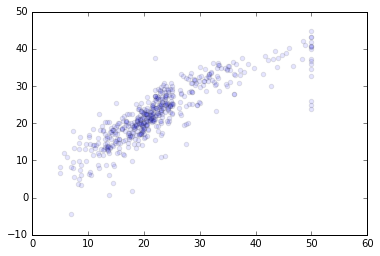

In [22]:
plt.scatter(medv, pred_LR, alpha=0.1)